# Data-5 Team-2
## Week-2, Task-1

### Preprocessing

importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing the data

In [3]:
df = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")

In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
9655,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone
9657,Parkinson Exercices FR,MEDICAL,4.172966,3,9.5,1000,Free,0.0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+
9659,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.0,10000000,Free,0.0,Everyone


Checking the relation between the content rating and the price 

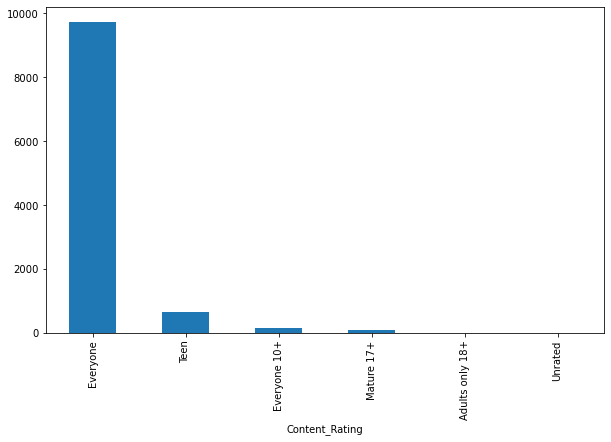

In [35]:
df.groupby(['Content_Rating'])['Price'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6))

we see that The `Everyone` rating has the highest price sum.

### More detailed view

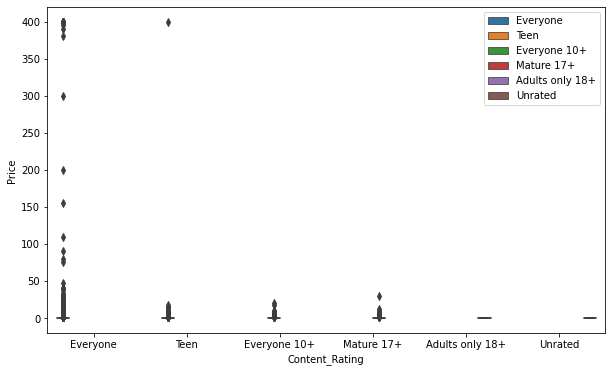

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Content_Rating", y="Price", hue="Content_Rating")
plt.legend(bbox_to_anchor=(1, 1))

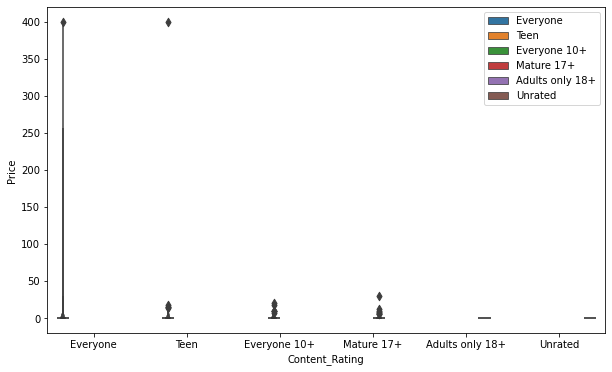

In [47]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="Content_Rating", y="Price", hue="Content_Rating")
plt.legend(bbox_to_anchor=(1, 1))

We can see from both plots that there's no solid pattern and we have lots of outliers. Meaning that their might not be any correlation.

### Some experimenting 

#### In this experiment I'll try to change the content rating categorization in order to obtain different statistics

Copying the dataset for redundancy

In [20]:
df_copy = df.copy()
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone


Re-categorizing the content rating by replacing the string labels with numeric ones. 

In [21]:
def convert_type(c_rating):
    if c_rating == "Everyone":
        return 0
    elif c_rating == "Everyone 10+":
        return 1
    elif c_rating == "Teen":
        return 2
    elif c_rating == "Mature 17+":
        return 3
    elif c_rating == "Adults only 18+":
        return 4
    else:
        return 5

df_copy['Content_Rating'] = df_copy['Content_Rating'].apply(convert_type)
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,0


Checking the correlation between The `Content Rating` and The `Price` 

In [23]:
df_copy['Content_Rating'].corr(df_copy['Price'])

-0.016101142607522222

We see that the correlation rating is very close to zero. Meaning that there's probably no correlation whatsoever.

Creating a new data frame consisting of only The `Price` and The `Content Rating` to visualize their correlation matrix

In [24]:
df_corr = df_copy.loc[:, ['App' , 'Price', "Content_Rating"]]
df_corr.head()

,App,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,0
1,Coloring book moana,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,0
3,Sketch - Draw & Paint,0.0,2
4,Pixel Draw - Number Art Coloring Book,0.0,0


Visualizing the correlation matrix

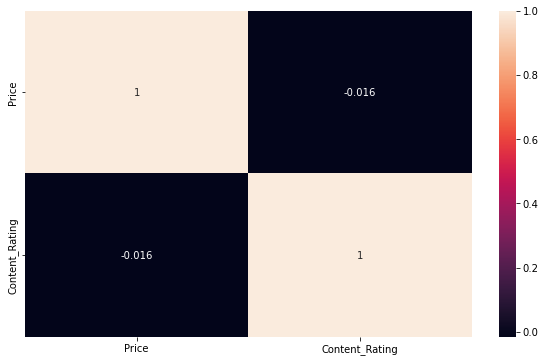

In [27]:
corr_matrix = df_corr.corr()
mtrx = plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## New section

Since we are dealing with The Price, I'll be dropping the free apps for now.

In [34]:
df_paid = df[df["Type"] != "Free"]
df_paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone


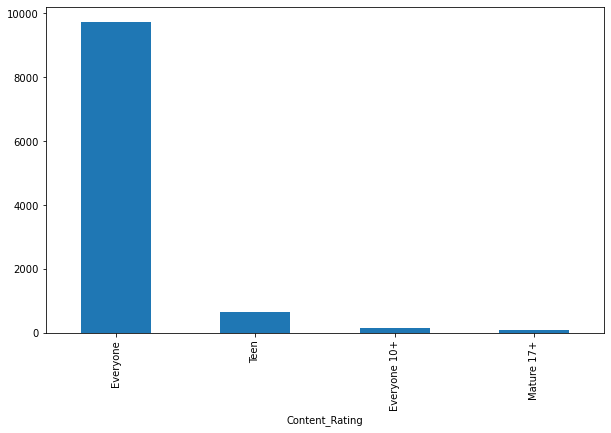

In [36]:
df_paid.groupby(['Content_Rating'])['Price'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6))

The plot is the same of course but, now we don't have The `Adults only 18+` and The `Unrated` categories since they have no paid apps.

### More detailed view

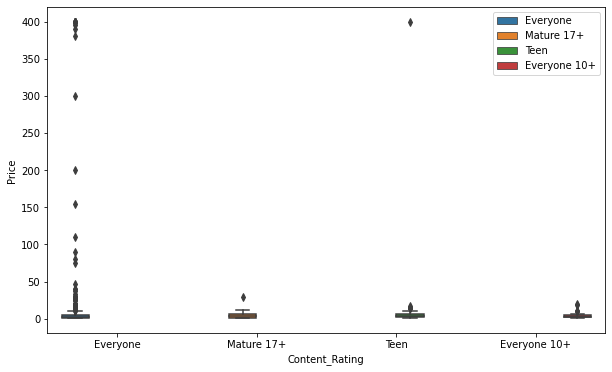

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_paid, x="Content_Rating", y="Price", hue="Content_Rating")
plt.legend(bbox_to_anchor=(1, 1))

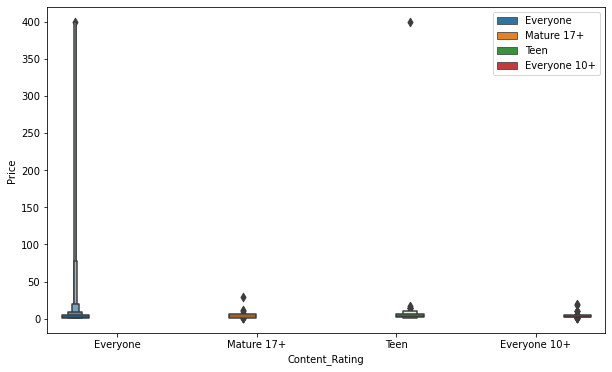

In [39]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_paid, x="Content_Rating", y="Price", hue="Content_Rating")
plt.legend(bbox_to_anchor=(1, 1))

We can see that price range is almost the same for all the content ratings. where there are still lots of outliers.

## Some experimenting 

#### In this experiment I'll try to change the content rating categorization in order to obtain different statistics

Copying the dataset for redundancy

In [40]:
dfPaid_copy = df_paid.copy()
dfPaid_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone


Re-categorizing the content rating by replacing the string labels with numeric ones. 

In [41]:
def convert_type(c_rating):
    if c_rating == "Everyone":
        return 0
    elif c_rating == "Everyone 10+":
        return 1
    elif c_rating == "Teen":
        return 2
    elif c_rating == "Mature 17+":
        return 3
    elif c_rating == "Adults only 18+":
        return 4
    else:
        return 5

dfPaid_copy ['Content_Rating'] = dfPaid_copy['Content_Rating'].apply(convert_type)
dfPaid_copy .head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,0
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,0
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,0
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,3
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,0


Checking the correlation between The `Content Rating` and The `Price` 

In [42]:
dfPaid_copy ['Content_Rating'].corr(dfPaid_copy['Price'])

-0.0295109526584135

We see that the correlation rating is higher than the previous section but it's still very close to zero. Meaning that there's probably no correlation whatsoever.

Creating a new data frame consisting of only The `Price` and The `Content Rating` to visualize their correlation matrix

In [43]:
dfPaid_corr = dfPaid_copy .loc[:, ['App' , 'Price', "Content_Rating"]]
dfPaid_corr.head()

,App,Price,Content_Rating
233,TurboScan: scan documents and receipts in PDF,4.99,0
234,Tiny Scanner Pro: PDF Doc Scan,4.99,0
372,Puffin Browser Pro,3.99,0
406,"Moco+ - Chat, Meet People",3.99,3
407,Calculator,6.99,0


Visualizing the correlation matrix

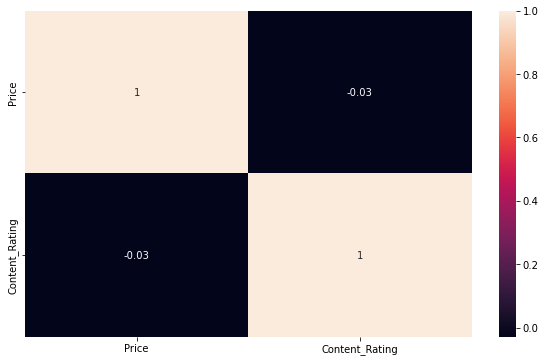

In [44]:
corr_matrixPaid = dfPaid_corr.corr()
mtrx = plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrixPaid, annot=True)
plt.show()